# Aula 5 - An√°lise Descritiva

#### Descri√ß√£o das an√°lises:

Foi verficado a distribui√ß√£o de 4 features importantes do dataset:

- Idade do Motorista (driver_age)
- N√≠vel do resultado da parada (stop_outcome_level)
- Tempo da Parada (stop_duration_continuous)
- Hor√°rio da Parada (stop_time_discrete)

Nota: algumas dessas features foram criadas ou modificadas(transformadas em num√©ricas) para a an√°lise.

Para auxiliar na an√°lise, para cada uma das features foi verificado para paradas gerais e paradas que resultaram em pris√£o:

- Histograma
- Boxplot
- QQ Plot

definidos no m√©todo: `plot_distribution`

As conclus√µes est√£o descritas em cada uma das an√°lises.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
csv_path = "../data/police.csv"
df = pd.read_csv(csv_path)

Aplica transforma√ß√µes de ETL(definidas nas √∫ltimas atividades) nos dados:

In [3]:
from etl.main import PoliceDatasetEtl

police_dataset_etl = PoliceDatasetEtl(df.copy())
featured_df = police_dataset_etl.clean_transform()

In [4]:
featured_df.head()

stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  ...  \
0        20.0       White          Speeding  Speeding             False  ...   
1        40.0       White          Speeding  Speeding             False  ...   
2        33.0       White          Speeding  Speeding             False  ...   
3        19.0       White  Call for Service     Other             False  ...   
4        21.0       White          Speeding  Speeding             False  ...   

  drugs_related_stop stop_outcome_level  violation_level  \
0              False                  3                5   
1              False                  3                5   
2              False                  3                5   
3              False                  5                1   
4              False                  3                5   

  proportional_stop_outcome  stop_time_discrete  stop_duration_continuous  \
0                       0.6                1.55                       7.5   
1                       0.6                8.15                       7.5   
2                       0.6               23.15                       7.5   
3                       5.0               17.15                      23.0   
4                       0.6               10.00                       7.5   

   is_black_or_hispanic  stop_time_discrete_bins  driver_age_bins  counter  
0                 False                     dawn            jovem        1  
1                 False                  morning           adulto        1  
2                 False                    night           adulto        1  
3                 False                  evening            jovem        1  
4                 False                  morning            jovem        1  

[5 rows x 24 columns]

## Distribui√ß√µes:

In [5]:
def plot_distribution(general: pd.Series, arrested: pd.Series, title: str):
    """
    plot_distribution - plots distribution of a variable

    It plots:

    * Histograms
    * Boxplots
    * QQ Plots
    ----------------------------------------------------------
    Parameters:

    general: pd.Series - general distribution
    arrested: pd.Series - arrested distribution (filtered)
    title: str - title of the plots
    """
    plt.figure(figsize=(16, 16))
    n_rows = 3
    n_cols = 2

    plt.subplot(n_rows, n_cols, 1)
    sns.histplot(general, kde=True, color="blue")
    plt.title(f"{title} Distribution - General")

    plt.subplot(n_rows, n_cols, 2)
    sns.histplot(arrested, kde=True, color="blue")
    plt.title(f"{title} Distribution - Arrested")

    plt.subplot(n_rows, n_cols, 3)
    sns.boxplot(x=general)

    plt.subplot(n_rows, n_cols, 4)
    sns.boxplot(x=arrested)

    plt.subplot(n_rows, n_cols, 5)
    stats.probplot(general, dist="norm", plot=plt)
    plt.title(f"QQ Plot - {title}")

    plt.subplot(n_rows, n_cols, 6)
    stats.probplot(arrested, dist="norm", plot=plt)
    plt.title(f"QQ Plot - {title} Arrested")

### Distribui√ß√£o da Idade do Motorista (driver_age)

### An√°lise üìà 

**üìä Tipo de Distribui√ß√£o:** Distribui√ß√£o n√£o sim√©trica (Gama)

**üìù Notas:**

- A distribui√ß√£o √© n√£o sim√©trica, enviesada na faixa entre 30~40 anos.
- Ap√≥s essa faixa, podemos observar no `QQ plot` que a distribui√ß√£o assume caracter√≠sticas de uma distribui√ß√£o normal. Chegando pr√≥ximo a linha esperada.
- Podemos perceber uma pequena diferen√ßa entre a distribui√ß√£o geral e a distribui√ß√£o de paradas que resultaram em pris√£o ao analisar o `boxplot`:
  - O 75 percentil √© menor que 40 anos na distribui√ß√£o "arrested", enquanto na distribui√ß√£o geral √© maior que 40 anos.

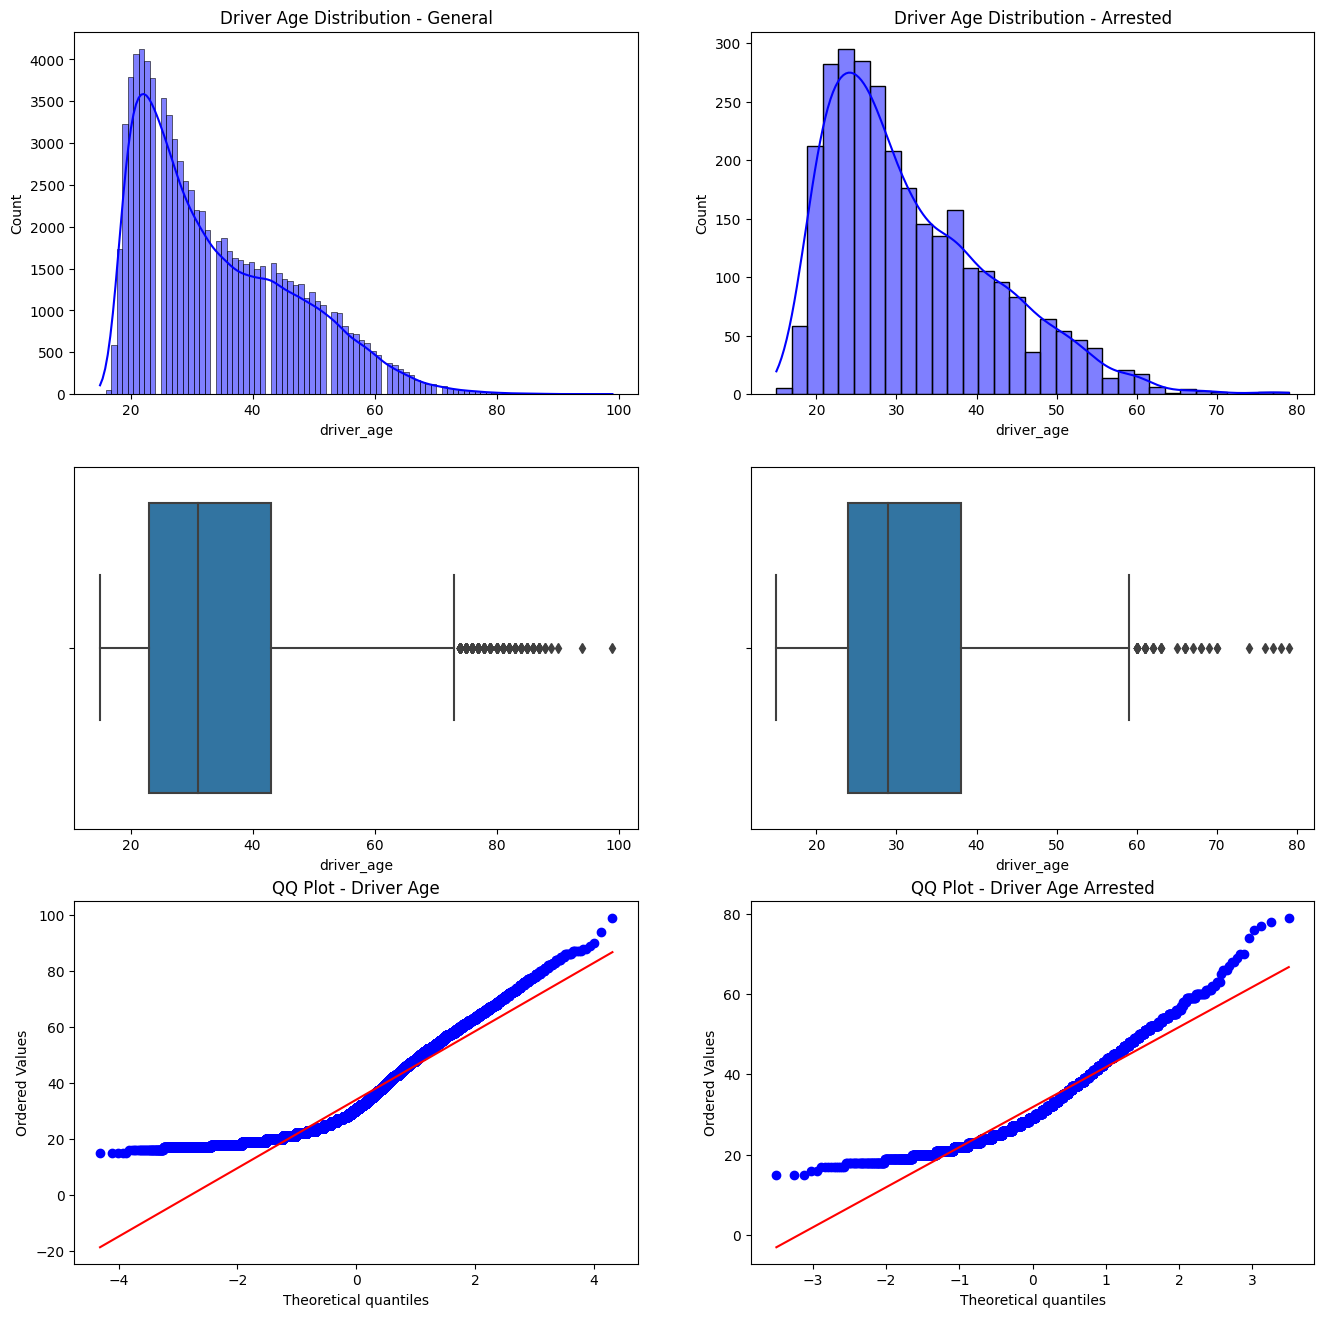

In [6]:
# Tira a idade zero (que indica falta do dado nesse dataset - tratado no processo de etl)
driver_age_df = featured_df.copy()[featured_df.driver_age > 0.0]
driver_age_arrested_df = driver_age_df[driver_age_df["is_arrested"] == True]

plot_distribution(
    general=driver_age_df.driver_age,
    arrested=driver_age_arrested_df.driver_age,
    title="Driver Age",
)

### Distribui√ß√£o do N√≠vel do Resultado da Parada (stop_outcome_level)

#### An√°lise üìà 

**üìä Tipo de Distribui√ß√£o:**
- A distribui√ß√£o foi aplicado em uma vari√°vel categ√≥rica ordinal, portanto o resultado n√£o foi o esperado.
- Ainda podemos inferir uma distribui√ß√£o para cada um dos casos:
  - Para o caso geral, podemos inferir uma distribui√ß√£o normal, pois a maioria dos dados est√£o concentrados no centro.
  - Para o caso de paradas resultantes em pris√£o, podemos inferir uma distribui√ß√£o enviesada (exponencial), o que √© esperado porque a pris√£o est√° diretamente relacionada com o n√≠vel de resultado da parada.

**üìù Notas:**
- O `boxplot` e o `QQ Plot` n√£o revelaram muitas informa√ß√µes sobre a distribui√ß√£o dos dados.
- Provavelmente porque a vari√°vel √© categ√≥rica

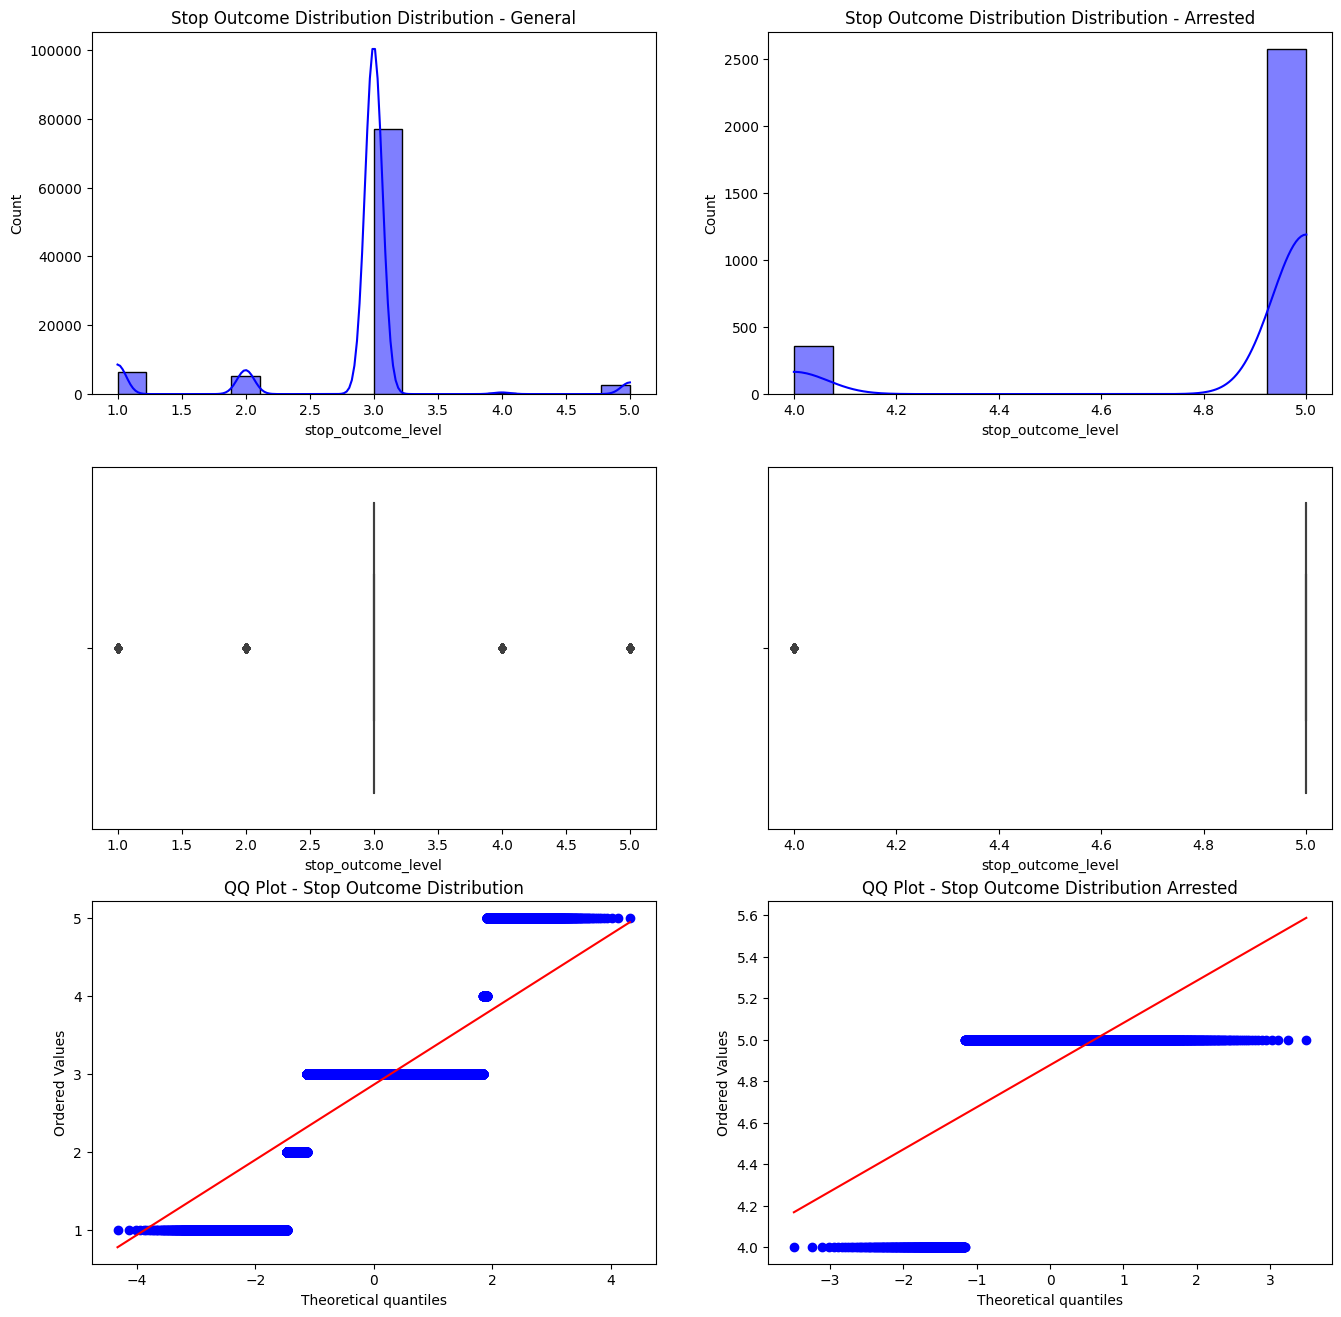

In [7]:
stop_outcome_df = featured_df.copy()
stop_outcome_arrested_df = stop_outcome_df[stop_outcome_df.is_arrested == True]

plot_distribution(
    general=stop_outcome_df.stop_outcome_level,
    arrested=stop_outcome_arrested_df.stop_outcome_level,
    title="Stop Outcome Distribution",
)

### Distribui√ß√£o de tempo de parada (stop_duration_continuous)

#### An√°lise üìà 

**üìä Tipo de Distribui√ß√£o:** Normal

**üìù Notas:**

- Apesar da tentativa de transformar a coluna `stop_duration` em uma vari√°vel num√©rica, n√£o foi poss√≠vel. Ela continuou sendo uma vari√°vel categ√≥rica, por√©m com valores num√©ricos(ordinal).
- Assim como na an√°lise acima, o `QQ Plot` n√£o foi proveu muita informa√ß√£o(vari√°vel categ√≥rica).
- O `boxplot` no entanto mostra que paradas que resultam em pris√£o s√£o mais longas.

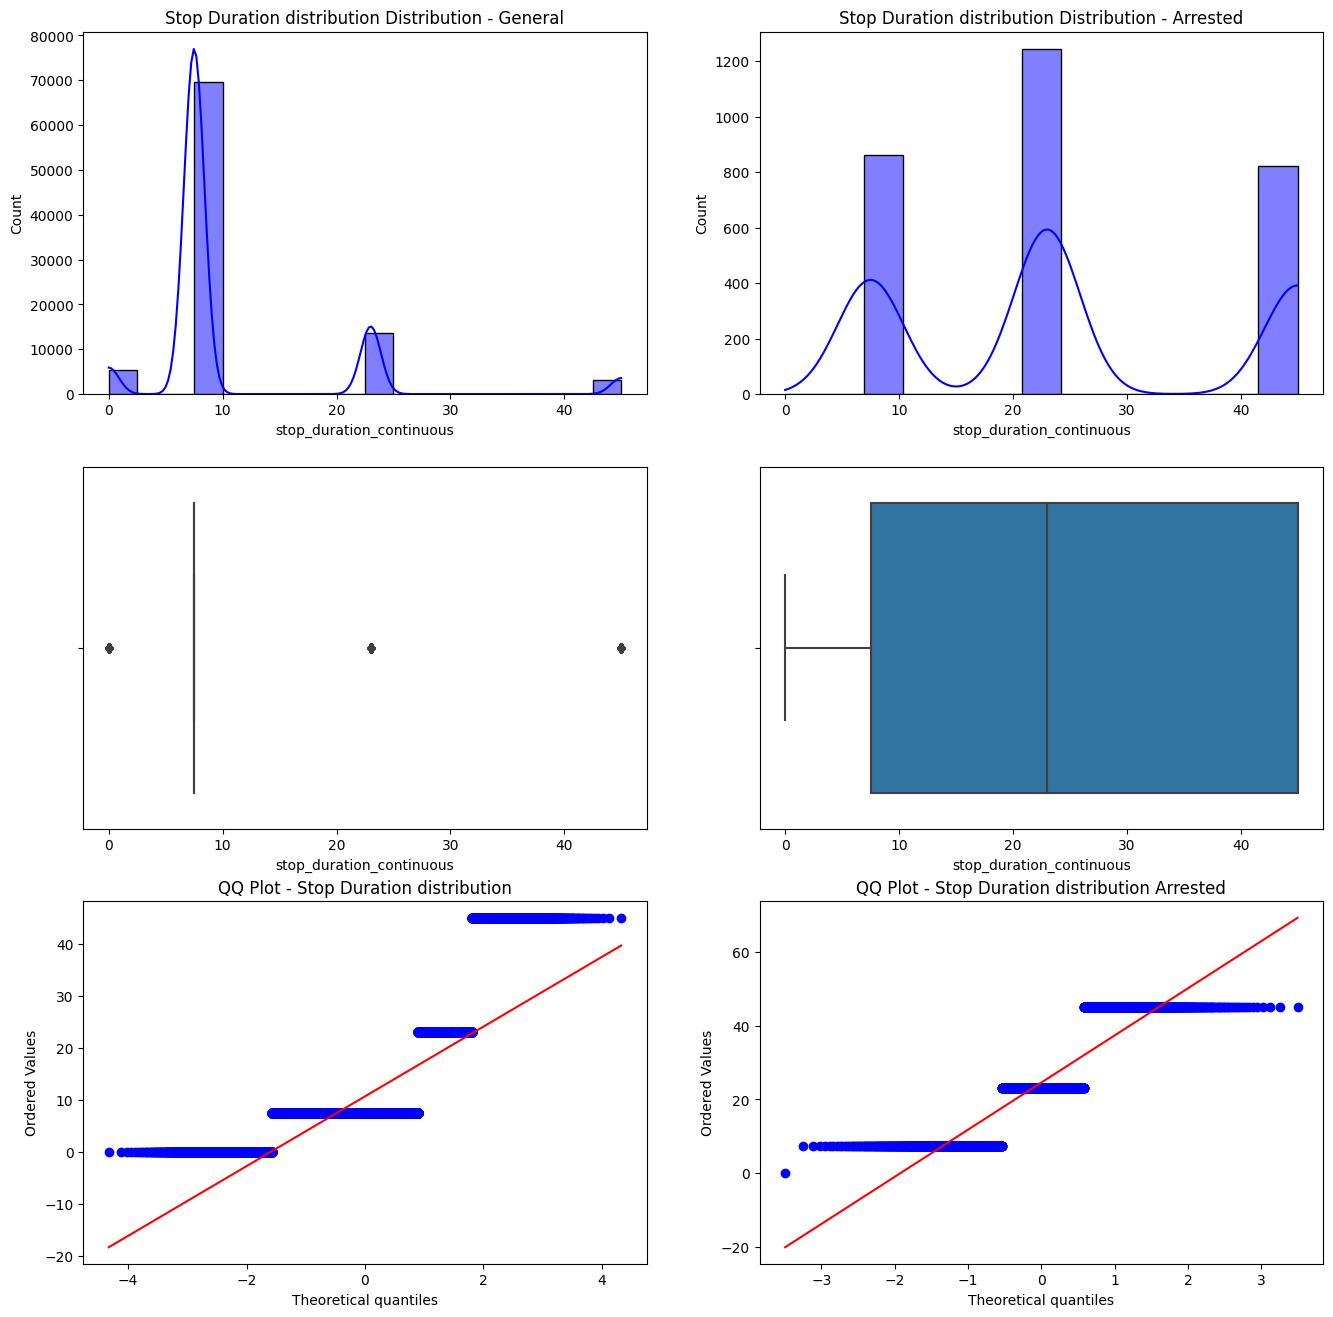

In [8]:
stop_time_df = featured_df.copy()
stop_time_arrested_df = stop_time_df[stop_time_df.is_arrested == True]

plot_distribution(
    general=stop_time_df.stop_duration_continuous,
    arrested=stop_time_arrested_df.stop_duration_continuous,
    title="Stop Duration distribution",
)

### Distribui√ß√£o do Hor√°rio da Para (stop_time_discrete)

#### An√°lise üìà 

**üìä Tipo de Distribui√ß√£o:** 
- Para paradas gerais: Distribui√ß√£o multimodal.
- Para paradas que resultaram em pris√£o: Distribui√ß√£o uniforme, por√©m com um vi√©s nas primeiras horas do dia(madrugada).

**üìù Notas:**
- A marioria das paradas que resultaram em pris√£o est√£o entre: 22:00 e 04:00.
- O `boxplot` que se baseia em estimativas de quartis(robustas), mostrou pouca diferen√ßa na distribui√ß√£o dos dados.
- √â poss√≠vel perceber que as distribui√ß√µes n√£o seguem a distribui√ß√£o normal ao olhar para o `QQ Plot`. 

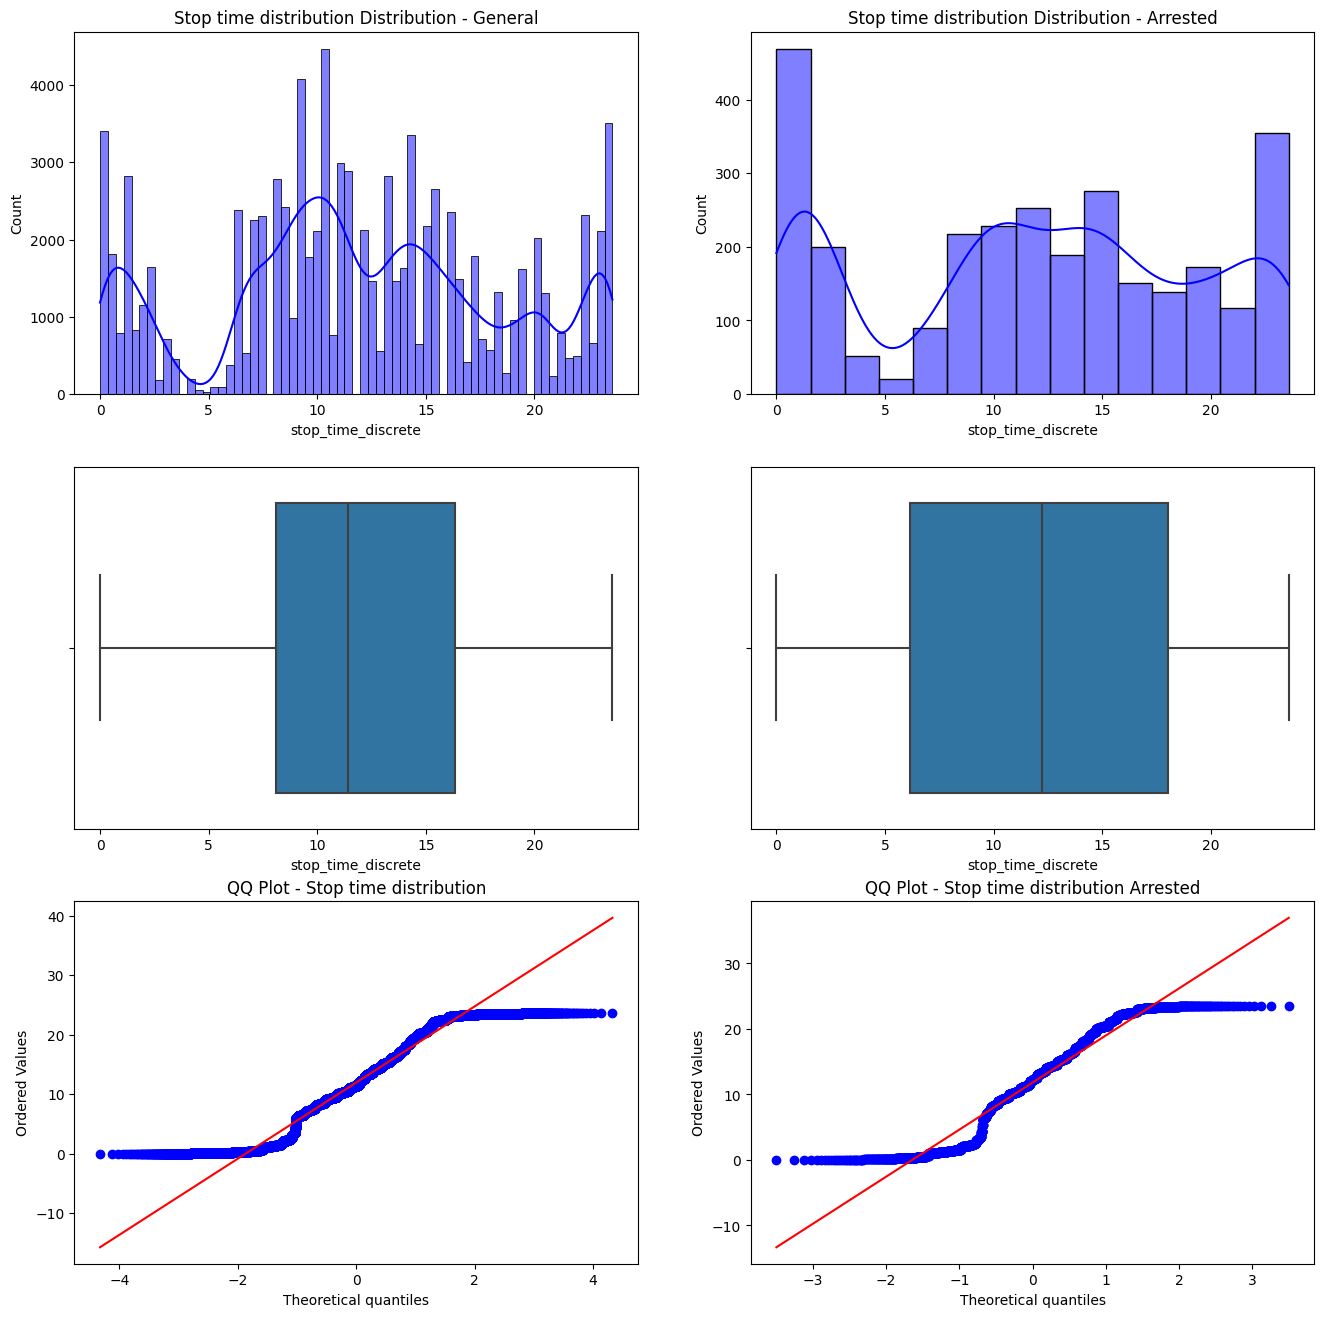

In [9]:
stop_time_df = featured_df.copy()
stop_time_arrested_df = stop_time_df[stop_time_df.is_arrested == True]

plot_distribution(
    general=stop_time_df.stop_time_discrete,
    arrested=stop_time_arrested_df.stop_time_discrete,
    title="Stop time distribution",
)